In [1]:
# Imports and display options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

import seaborn as sns
from seaborn import plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import pickle

pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 20

%matplotlib inline

/Users/maludee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open("team_stats.pkl", 'rb') as picklefile:
   team_stats = pickle.load(picklefile)

In [3]:
team_stats['log_avg_wl'] = np.log(team_stats.avg_wl_ratio)
team_stats = team_stats.drop(['avg_wl_ratio','team','season'],1)
team_stats.head()

,avg_field_goals,avg_fg_att,avg_fg3_pct,avg_steals,avg_salary,avg_age,avg_per,avg_pct_started,strong_link,weak_link,opp_3_pct,opp_fg_pct,opp_fg_att,pace,log_avg_wl
0,387.00,866.80,0.28,73.00,"4,992,921.60",22.80,14.56,0.91,0.75,-0.68,0.37,0.48,6433,90.40,-0.77
1,347.00,763.40,0.28,68.40,"5,066,493.80",22.20,15.82,0.66,0.75,-0.39,0.38,0.47,6335,90.00,-0.55
2,418.40,925.40,0.22,76.60,"7,488,752.00",23.80,16.08,0.86,0.48,-0.29,0.36,0.46,6733,91.10,-0.20
3,414.40,898.00,0.28,77.20,"9,775,806.60",24.80,16.94,0.86,0.35,-0.30,0.35,0.45,6609,89.60,0.29
4,435.20,908.00,0.41,80.80,"8,760,402.20",25.80,17.08,0.97,0.43,-0.30,0.34,0.46,6623,90.10,0.60


In [4]:
team_norm = (team_stats - team_stats.min()) / (team_stats.max() - team_stats.min())

In [5]:
y_team=team_stats['log_avg_wl']
X_team=team_stats.drop(['log_avg_wl','avg_field_goals'],1)

In [6]:
X_team.shape
y_team.shape

(329,)

In [7]:
lr=LinearRegression()

xtrain, xtest, ytrain, ytest = train_test_split(X_team, y_team, test_size=0.3)

lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.77666533643187285

In [12]:
rcv = RidgeCV(cv=5)
rcv.fit(xtrain, ytrain)
rcv.score(xtest, ytest)

0.71752031290331386

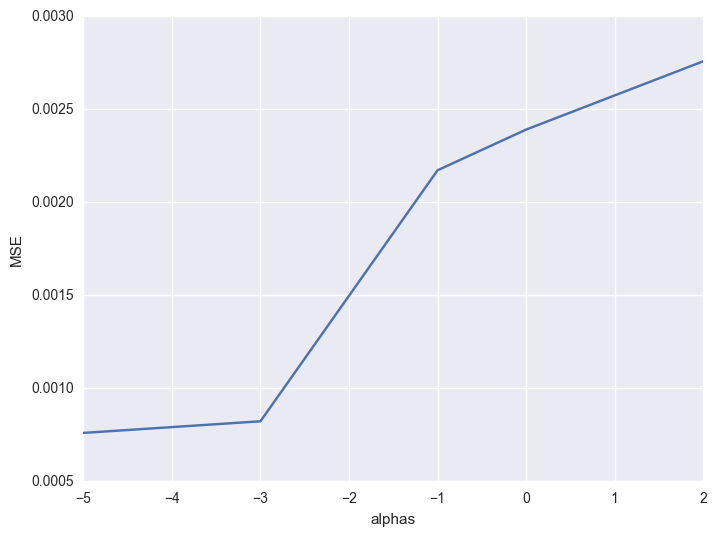

In [35]:
# Test, train, split option via Ridge 
alphas=[1e-5,1e-3,1e-1,1,100]
X_train, X_test, y_train, y_test = train_test_split(X_team, y_team, test_size=0.3)

def make_estimator(est,alpha):
    est.alpha=alpha
    model = est.fit(X_train,y_train)
    mse=np.mean(y_test-model.predict(X_test))**2
    return mse
    
# Get scores
all_mse=[]    
for a in alphas:    
    all_mse.append(make_estimator(Ridge(),a))
    

#plot of model
plt.figure(figsize=(8,6))
plt.legend()
plt.plot(np.log10(alphas),all_mse)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()

In [27]:
y_test_pred = model.predict(X_test)
print y_test_pred


NameError: name 'model' is not defined

In [ ]:
zipped=zip(X_team.columns,est.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features[:5]

In [ ]:
print mean_squared_error(y_test, y_test_pred)
plt.scatter(y_test, y_test_pred)
plt.xlabel("actual")
plt.ylabel("prediction");